In [1]:
# load needed libraries
library(Hmisc)                                                             # describtive statistics
library(dplyr)                                                             # xtra functions
library(igraph)                                                            # iGraph
library(networkD3)                                                         # xtra graphs

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, round.POSIXt, trunc.POSIXt, units


Attaching package: 'dplyr'

The following objects are masked from 'package:Hmisc':

    combine, src, summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'igraph'

The following objects are masked from 'package:dplyr':

    %>%, as_data_frame, groups, union

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
# load data into data frames
df_pers      <- read.csv("./data/POperson.csv",          encoding = "UTF8", sep = ";")
df_poke      <- read.csv("./data/POpokemon.csv",         encoding = "UTF8", sep = ";")
df_pers2pers <- read.csv("./data/POperson-person.csv",   encoding = "UTF8", sep = ";")
df_poke2poke <- read.csv("./data/POpokemon-pokemon.csv", encoding = "UTF8", sep = ";")

In [3]:
# create clean Pokémon-Pokémon data frame
y <- merge.data.frame(df_poke, df_poke2poke, by.x = "ID", by.y = "PokeID2", all=FALSE)
d_poke2poke <- merge.data.frame(df_poke, y, by.x = "ID", by.y = "PokeID1", all=FALSE)
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "ID")]                                                      # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "PokemonDE.x")]                                             # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Type1.x")]                                                 # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Type2.x")]                                                 # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Total.x")]                                                 # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "HP.x")]                                                    # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Attack.x")]                                                # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Defense.x")]                                               # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Speed.Attack.x")]                                          # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Speed.Defense.x")]                                         # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Speed.x")]                                                 # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "cTypeNum.x")]                                              # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "cTypeName.x")]                                             # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "PokemonDE.y")]                                             # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Type1.y")]                                                 # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Type2.y")]                                                 # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Total.y")]                                                 # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "HP.y")]                                                    # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Attack.y")]                                                # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Defense.y")]                                               # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Speed.Attack.y")]                                          # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Speed.Defense.y")]                                         # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "Speed.y")]                                                 # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "cTypeNum.y")]                                              # remove columns
d_poke2poke <- d_poke2poke[,!(names(d_poke2poke) == "cTypeName.y")]                                             # remove columns
names(d_poke2poke)[names(d_poke2poke)=="PokemonEN.x"] <- "Pokemon.Winner"                                       # rename column
names(d_poke2poke)[names(d_poke2poke)=="PokemonEN.y"] <- "Pokemon.Looser"                                       # rename column
names(d_poke2poke)[names(d_poke2poke)=="Folge1"]      <- "Episode1"                                             # rename column
names(d_poke2poke)[names(d_poke2poke)=="Folge2"]      <- "Episode2"                                             # rename column
names(d_poke2poke)[names(d_poke2poke)=="Folge3"]      <- "Episode3"                                             # rename column
names(d_poke2poke)[names(d_poke2poke)=="Folge4"]      <- "Episode4"                                             # rename column
names(d_poke2poke)[names(d_poke2poke)=="Gesamt"]      <- "Total"                                                # rename column

Warning message:
In merge.data.frame(df_poke, y, by.x = "ID", by.y = "PokeID1", all = FALSE): column name 'ID' is duplicated in the result

In [4]:
# create Pokémon-vs-Pokémon graphs G and adjacency matrices M

# all Pokémons
G_poke_ap <- graph.data.frame(d_poke2poke, directed=TRUE, vertices=select(df_poke,PokemonEN,cTypeNum,cTypeName))
G_poke_ip <- graph.data.frame(d_poke2poke, directed=TRUE, vertices=NULL)
M_poke_ip <- get.adjacency(G_poke_ip)

# Pokémons in episode 1
G_poke_e1 <- delete.edges(G_poke_ip, E(G_poke_ip)[E(G_poke_ip)$Episode1 != 1])
M_poke_e1 <- get.adjacency(G_poke_e1)

# Pokémons in episode 2
G_poke_e2 <- delete.edges(G_poke_ip, E(G_poke_ip)[E(G_poke_ip)$Episode2 != 1])
M_poke_e2 <- get.adjacency(G_poke_e2)

# Pokémons in episode 3
G_poke_e3 <- delete.edges(G_poke_ip, E(G_poke_ip)[E(G_poke_ip)$Episode3 != 1])
M_poke_e3 <- get.adjacency(G_poke_e3)

# Pokémons in episode 4
G_poke_e4 <- delete.edges(G_poke_ip, E(G_poke_ip)[E(G_poke_ip)$Episode4 != 1])
M_poke_e4 <- get.adjacency(G_poke_e4)

NULL

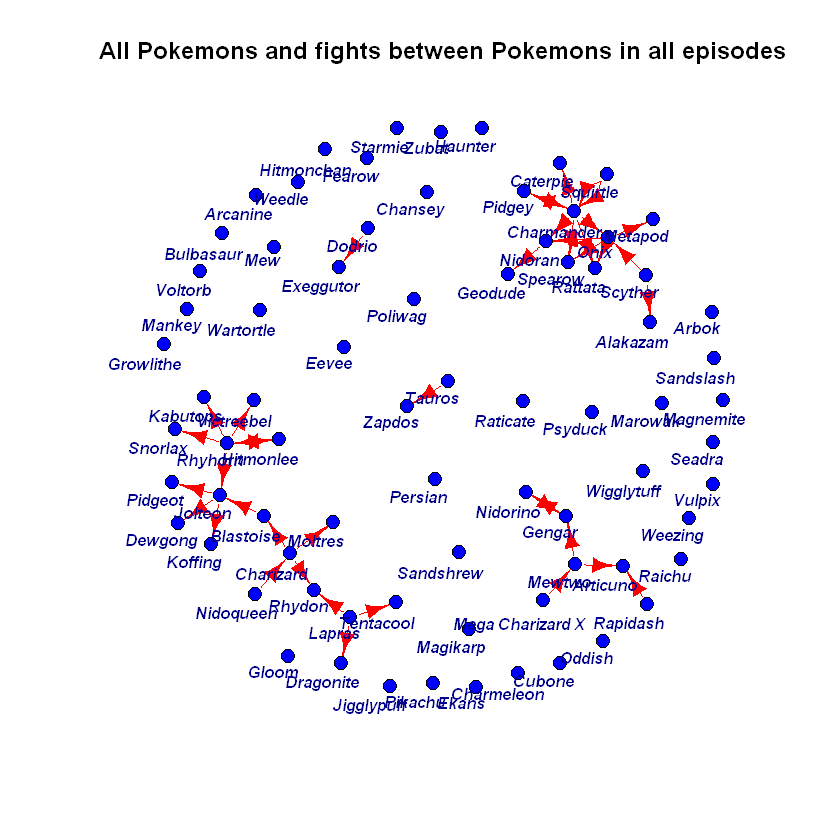

In [5]:
# all Pokémon-VS-Pokémon fights within all pokemons
plot.igraph(G_poke_ap,
            main = "All Pokemons and fights between Pokemons in all episodes",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            #edge.label          = E(G_poke_ap)$Total,
            edge.width          = E(G_poke_ap)$Total,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 4,
            edge.label.color    = 'black'            
           )

G_poke_ap$cTypeName

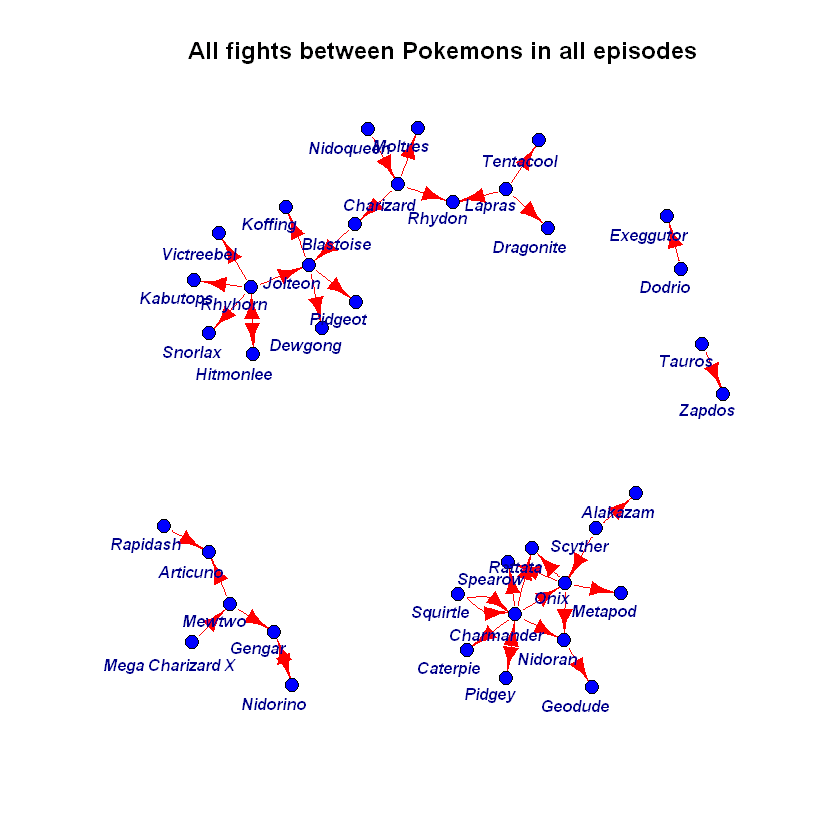

In [6]:
# all Pokémon-VS-Pokémon fights with just involved pokemons
plot.igraph(G_poke_ip,
            main = "All fights between Pokemons in all episodes",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            #edge.label          = E(G_poke_ip)$Total,
            edge.width          = E(G_poke_ip)$Total,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 4,
            edge.label.color    = 'black'            
           )

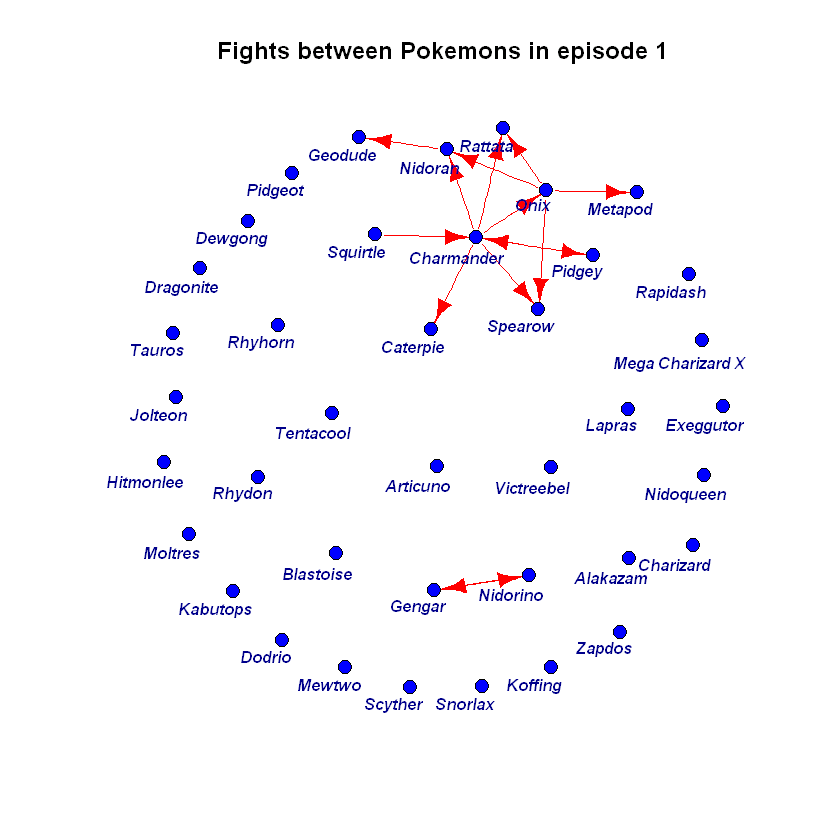

In [7]:
# Episode 1: Pokémon-VS-Pokémon
plot.igraph(G_poke_e1,
            main = "Fights between Pokemons in episode 1",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = E(G_poke_e1)$Episode1,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 4,
            edge.label.color    = 'black'            
          )

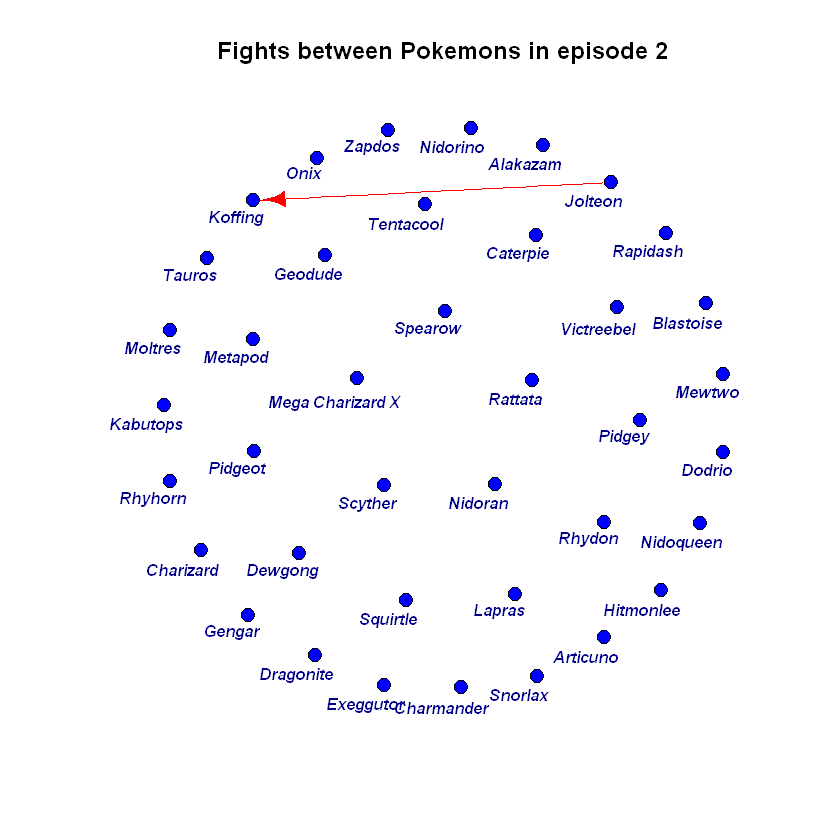

In [8]:
# Episode 2: Pokémon-VS-Pokémon
plot.igraph(G_poke_e2,
            main = "Fights between Pokemons in episode 2",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = E(G_poke_e2)$Episode2,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 4,
            edge.label.color    = 'black'            
          )

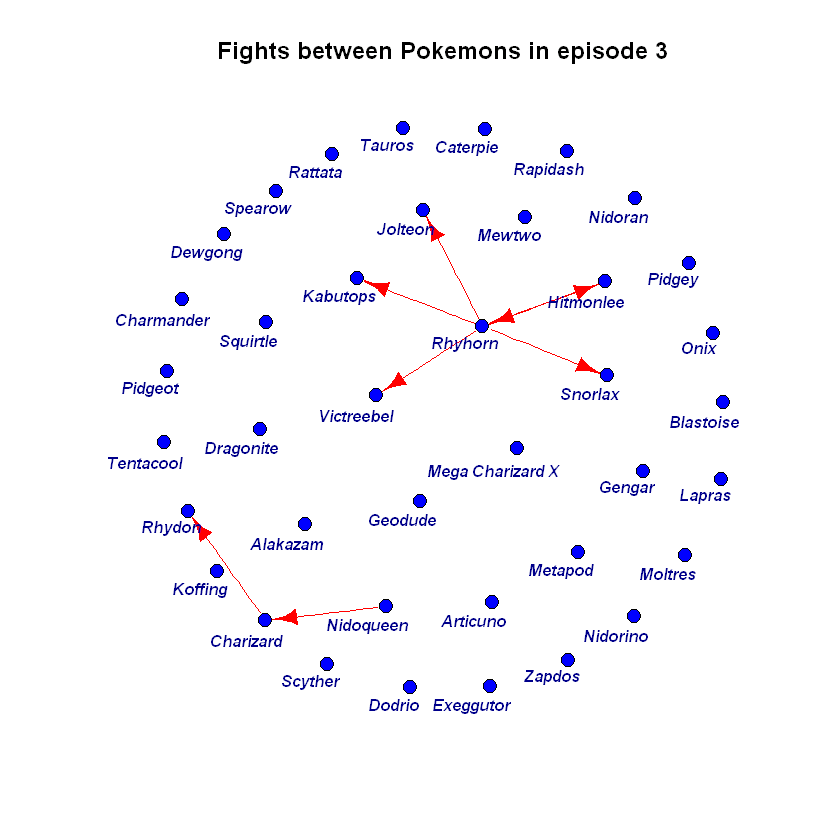

In [9]:
# Episode 3: Pokémon-VS-Pokémon
plot.igraph(G_poke_e3,
            main = "Fights between Pokemons in episode 3",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = E(G_poke_e3)$Episode3,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 4,
            edge.label.color    = 'black'            
          )

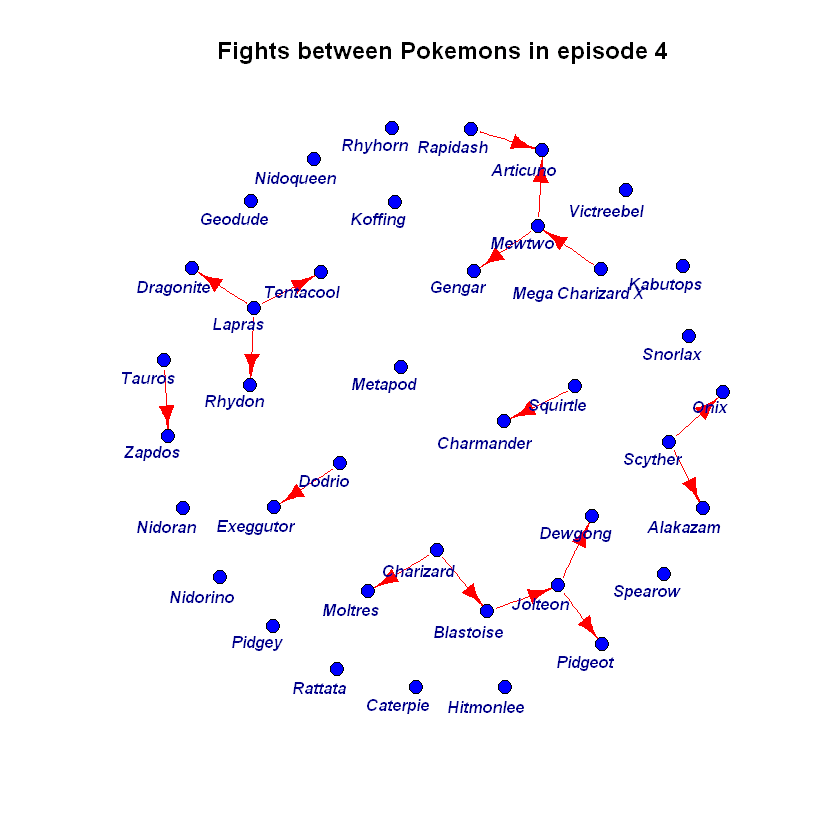

In [10]:
# Episode 4: Pokémon-VS-Pokémon
plot.igraph(G_poke_e4,
            main = "Fights between Pokemons in episode 4",
            layout=layout.kamada.kawai,
            vertex.size         = 5,
            vertex.color        = 'blue',
            vertex.label.family = 'sans',
            vertex.label.font   = 4,
            vertex.label.cex    = 0.8,
            vertex.label.dist   = -0.4,
            edge.label          = NA,
            edge.width          = E(G_poke_e4)$Episode4,
            edge.color          = 'red',
            edge.label.family   = 'sans',
            edge.label.font     = 4,
            edge.label.color    = 'black'            
          )

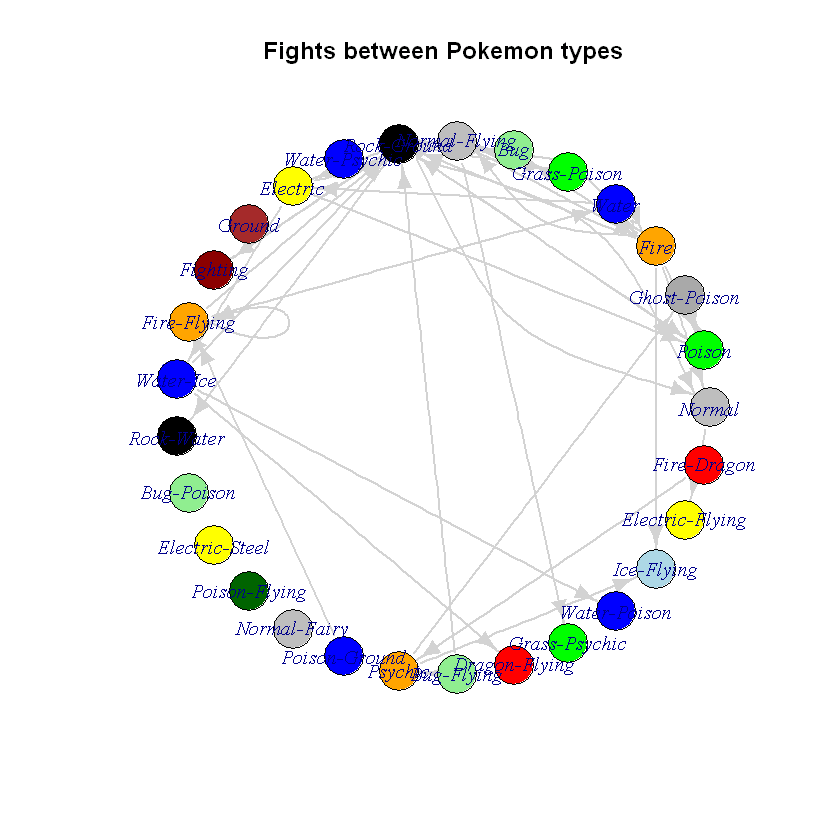

In [31]:
G_type <- G_poke_ap
uname <- unique(V(G_poke_ap)$cTypeName)
t_match <- match(V(G_type)$cTypeName, uname)
G_type <- contract.vertices(G_poke_ap, t_match)
V(G_type)$name <- uname

V(G_type)$color[V(G_type)$name == "Normal-Flying"] <- "gray"
V(G_type)$color[V(G_type)$name == "Bug"] <- "lightgreen"
V(G_type)$color[V(G_type)$name == "Grass-Poison"] <- "green"
V(G_type)$color[V(G_type)$name == "Water"] <- "blue"
V(G_type)$color[V(G_type)$name == "Fire"] <- "orange"
V(G_type)$color[V(G_type)$name == "Ghost-Poison"] <- "darkgray"
V(G_type)$color[V(G_type)$name == "Poison"] <- "green"
V(G_type)$color[V(G_type)$name == "Normal"] <- "gray"
V(G_type)$color[V(G_type)$name == "Fire-Dragon"] <- "red"
V(G_type)$color[V(G_type)$name == "Electric-Flying"] <- "yellow"
V(G_type)$color[V(G_type)$name == "Ice-Flying"] <- "lightblue"
V(G_type)$color[V(G_type)$name == "Water-Poison"] <- "blue"
V(G_type)$color[V(G_type)$name == "Grass-Psychic"] <- "green"
V(G_type)$color[V(G_type)$name == "Dragon-Flying"] <- "red"
V(G_type)$color[V(G_type)$name == "Bug-Flying"] <- "lightgreen"
V(G_type)$color[V(G_type)$name == "Psychic"] <- "orange"
V(G_type)$color[V(G_type)$name == "Poison-Ground"] <- "blue"
V(G_type)$color[V(G_type)$name == "Normal-Fairy"] <- "gray"
V(G_type)$color[V(G_type)$name == "Poison-Flying"] <- "darkgreen"
V(G_type)$color[V(G_type)$name == "Electric-Steel"] <- "yellow"
V(G_type)$color[V(G_type)$name == "Bug-Poison"] <- "lightgreen"
V(G_type)$color[V(G_type)$name == "Rock-Water"] <- "black"
V(G_type)$color[V(G_type)$name == "Water-Ice"] <- "blue"
V(G_type)$color[V(G_type)$name == "Fire-Flying"] <- "orange"
V(G_type)$color[V(G_type)$name == "Fighting"] <- "darkred"
V(G_type)$color[V(G_type)$name == "Ground"] <- "brown"
V(G_type)$color[V(G_type)$name == "Electric"] <- "yellow"
V(G_type)$color[V(G_type)$name == "Water-Psychic"] <- "blue"
V(G_type)$color[V(G_type)$name == "Rock-Ground"] <- "black"

# Pokémon types
plot.igraph(G_type,
            main = "Fights between Pokemon types",
            layout=layout.circle,
            vertex.size         = 15,
            vertex.label.family = 'sans',
            vertex.label.font   = 8,
            edge.label          = NA,
            edge.width          = 2,
            edge.color          = 'lightgray',
            edge.label.family   = 'sans',
            edge.label.font     = 3,
            edge.label.color    = 'lightgray'            
          )